# Virgin Atlantic Reviews Notebook 2: Data Analysis

The data for this notebook was obtained from Skytrax.com. We carried out the webscraping exercise in notebook one and in this notebook we continue with data analysis

In [305]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [306]:
reviews = pd.read_csv(r'C:\Users\imoge\AllMLProjects\Data\AirlineReviewsScraped.csv', 
                      index_col=0
                     )

In [307]:
reviews.head()

,Review Date,Review Title,Review Text,Flight Date,Seat Class,From,To,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
0,2025-03-08,appalling customer service,I’m extremely disappointed with the appalli...,2025-02-01 00:00:00,Economy Class,London Heathrow,Montego Bay,3,1,1,2,1,1,1
1,2025-02-26,Very cramped space for legs,"Very cramped space for legs, I am 186 (6""1) a...",2025-02-01 00:00:00,Economy Class,Antigua,London Heathrow,2,5,3,3,4,3,3
2,2025-01-05,grateful to staff at DEL airport,I am grateful to the staff at DEL airport for...,2025-01-01 00:00:00,Economy Class,Delhi,London Heathrow,0,0,0,0,2,0,5
3,2024-09-16,never make the mistake of using Virgin again,Normally I would connect in Amsterdam but go...,2024-09-01 00:00:00,Business Class,Orlando,London Heathrow,1,2,1,1,1,0,2
4,2024-08-13,crew with brilliant hospitality,Where do I start. this was simply the best fl...,2024-08-01 00:00:00,Premium Economy,London Heathrow,New York,1,2,5,3,3,4,3


In [308]:
# Reset the review date to a datetime object
reviews['Review Date'] = pd.to_datetime(reviews['Review Date'])

In [377]:
print(reviews['Review Date'].min())
print(reviews['Review Date'].max())

2015-01-14 00:00:00
2025-03-08 00:00:00


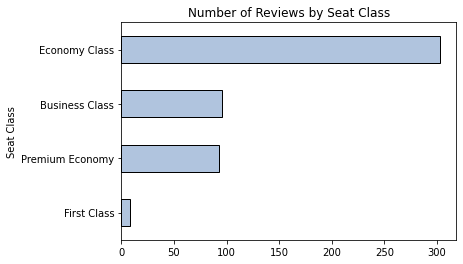

In [378]:
### Seat Classes
seats_classes = reviews.groupby('Seat Class', as_index = False)['Review Date'].count().sort_values(by = 'Review Date').set_index('Seat Class')
seats_classes.plot(kind = 'barh', color = 'lightsteelblue', ec = 'k', legend = None)
plt.title('Number of Reviews by Seat Class');

In [310]:
# Number of reviews by departure location
from_location = reviews.groupby('From', as_index = False)['Review Date'].count().sort_values(by = 'Review Date',ascending = False)
from_location.head()

,From,Review Date
26,London Heathrow,165
35,Not Provided,73
28,Manchester,38
33,New York,22
25,London Gatwick,21


In [311]:
# Drop the 'Not provided'
from_location = from_location[from_location['From']!='Not Provided'].set_index('From').head(10)
from_location

,Review Date
From,
London Heathrow,165
Manchester,38
New York,22
London Gatwick,21
Gatwick,18
Los Angeles,18
Orlando,17
San Francisco,12
Hartsfield Jackson Atlanta,10


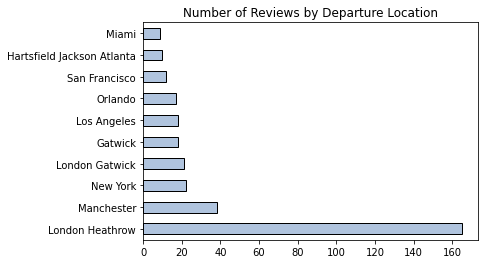

In [398]:
from_location.plot(kind = 'barh', color = 'lightsteelblue', 
                   ec = 'k', 
                   legend = None)
plt.gca().set_ylabel("")          
plt.title('Number of Reviews by Departure Location');

In [313]:
# Number of reviews by arrival location
to_location = reviews.groupby('To', as_index = False)['Review Date'].count().sort_values(by = 'Review Date', ascending = False)
to_location.head()

,To,Review Date
26,London Heathrow,126
37,Not Provided,73
35,New York,47
39,Orlando,29
30,Manchester,19


In [314]:
to_location = to_location[to_location['To']!='Not Provided'].set_index('To').head(10)
to_location

,Review Date
To,
London Heathrow,126
New York,47
Orlando,29
Manchester,19
Las Vegas,18
Los Angeles,16
San Francisco,15
Hong Kong,14
Miami,11


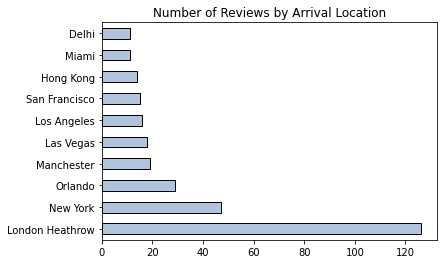

In [399]:
to_location.plot(kind = 'barh', 
                 color = 'lightsteelblue', 
                 ec = 'k', 
                 legend = None)
plt.gca().set_ylabel("")
plt.title('Number of Reviews by Arrival Location');

Most routes are to and from London Heathrow, which is not surprising given that this is the main airport Virgin operates from

In [316]:
# Reviews by Month
reviews['Month'] = reviews['Review Date'].dt.month  

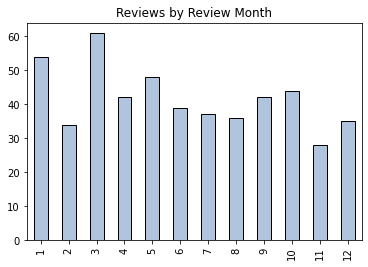

In [404]:
# Groupby month
reviews.groupby('Month', as_index = False)['Review Date'].count().set_index('Month').plot(kind = 'bar', 
                                                                                          color = 'lightsteelblue', 
                                                                                          ec = 'k',
                                                                                          legend = False)
plt.gca().set_xlabel("")
plt.title('Reviews by Review Month');

Peak review times for reviews to be left are in March with the least being left in November  
We can analyse the flight dates for those flights we have information for

In [318]:
# Flight dates for those review we have information for
reviews_flight_dates = reviews[reviews['Flight Date']!='Not available']

# Convert the string column to datetime
reviews_flight_dates['Flight Date'] = pd.to_datetime(reviews_flight_dates['Flight Date'])

# Extract the month
reviews_flight_dates['Flight Month'] = reviews_flight_dates['Flight Date'].dt.month

C:\Users\imoge\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\imoge\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


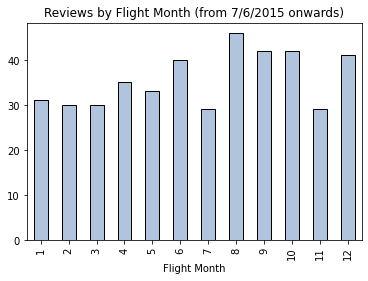

In [412]:
# Groupby month
reviews_flight_dates.groupby('Flight Month', as_index = False)['Flight Date'].count().set_index('Flight Month').plot(kind = 'bar', 
                                                                                                                     color = 'lightsteelblue', 
                                                                                                                     ec = 'k',
                                                                                                                    legend = False)
plt.title('Reviews by Flight Month (from 7/6/2015 onwards)');

Most flights were the flight date was provided were taken in August and the least in July and November

Let's have a look at the starred categories. We filled any nan values with zeros (as it was not possible to leave a zero rating, this was not a problem for our data) so we will filter our dataframe to just pull out those reviews which have a score above 0 in those columns

In [320]:
# Categories given ratings
list_cats = reviews.columns[7:-1]

In [321]:
# Plot the review ratings for the categories - a rating of zero means the category wasn't rated by the passenger
def review_ratings(cat):
    pd.DataFrame(reviews[cat].value_counts(normalize = True)*100).plot(kind = 'bar',
                                                                             color = 'lightsteelblue',
                                                                             ec = 'k',
                                                                            legend = False,
                                                                             title = cat + ' Ratings Distribution');

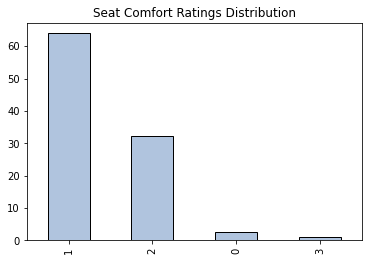

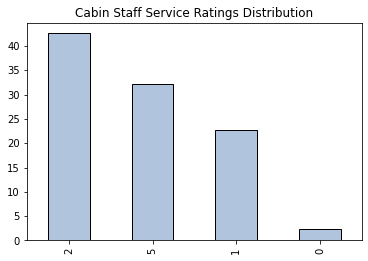

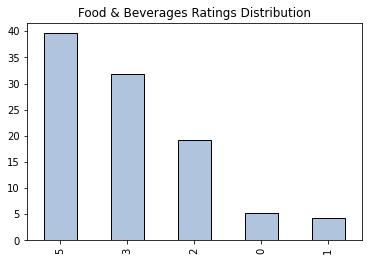

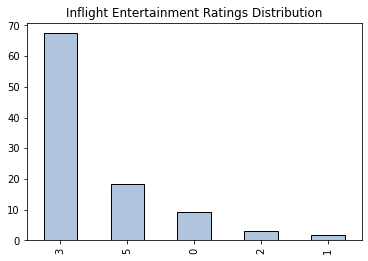

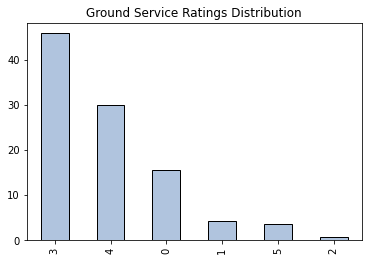

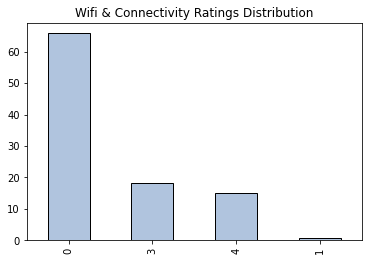

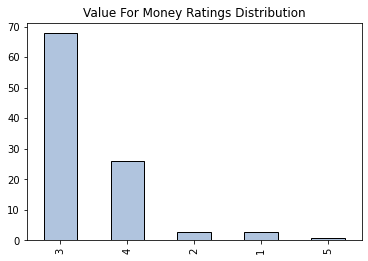

In [322]:
for i in list_cats:
    review_ratings(i)

Most ratings given for seat comfort were 1 and the most ratings for food and beverages were 5 stars. Let's have a more in-depth look at this

In [323]:
selected = reviews[['Seat Class','Seat Comfort','Cabin Staff Service','Food & Beverages', 'Inflight Entertainment', 'Ground Service',
        'Wifi & Connectivity','Value For Money']]

As they seem to be particularly unhappy with a key part of the service, which is the comfort of the seat, we can see if this varies by the type of seat class

In [414]:
# Function to plot the mean score for each category where a review has been given
def plot_scores(cat):
    rev = selected[reviews[cat]>0]
    score = rev.groupby('Seat Class', as_index = False)[cat].mean().sort_values(by = cat, ascending = False).set_index('Seat Class')
    score.plot(kind = 'barh',
              color = 'lightsteelblue',
              ec = 'k',
              legend = False,
              title = 'Average ' + cat + ' ' + 'Seat Comfort Score by Seat Class')
    plt.gca().set_ylabel("");
  

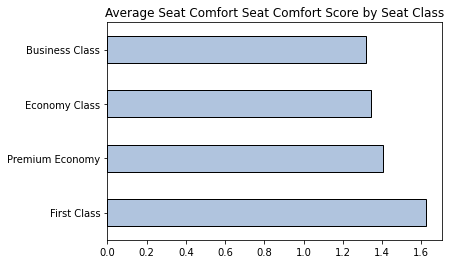

In [415]:
plot_scores('Seat Comfort')

As we might expect, seat comfort is scored most highly by first class passengers. The lowest average reviews were for business, below that for economy. This is interesting and perhaps might suggest further analysis of the business class offering is undertaken

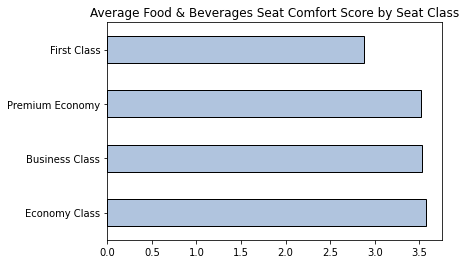

In [416]:
plot_scores('Food & Beverages')

The mean food and beverage scores by seat class show that first class passengers rated this lower than other passengers, perhaps because they were expecting a bit more for their money. Lets have a look at the other scores against seat class for completeness

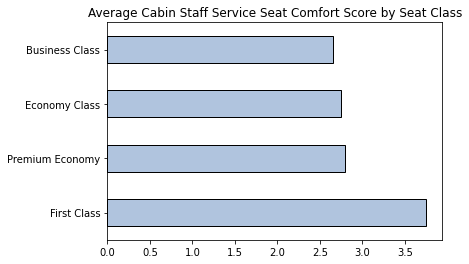

In [417]:
plot_scores('Cabin Staff Service')

First class passengers get a lot of individual attention from cabin crew with dedicated staff, so they seemed to rate this higher than the other passengers

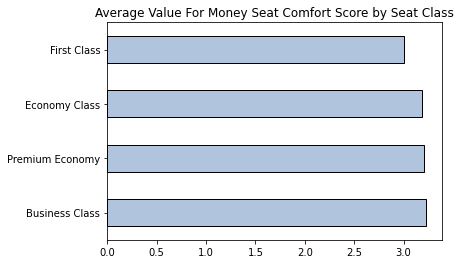

In [418]:
plot_scores('Value For Money')

First class seats are very much more expensive than the other types of seat on most flights and we can see the average scores for first class passengers are a little lower than the rest of the seat types

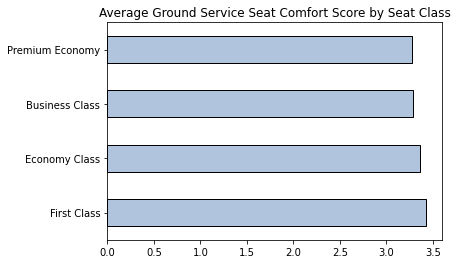

In [419]:
plot_scores('Ground Service')

In terms of ground service there is a slightly higher score given by first class for this experience than the other passenger types

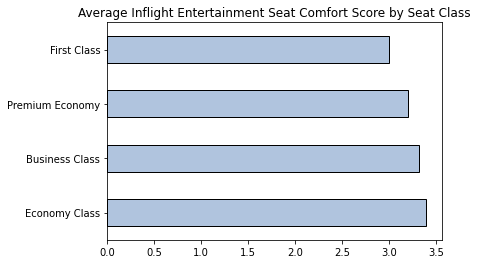

In [420]:
plot_scores('Inflight Entertainment')

There is little difference for inflight entertainment which is to be expected as all passengers generally get the same video options onboard but the rating for first class is the lowest where expectations might be higher.

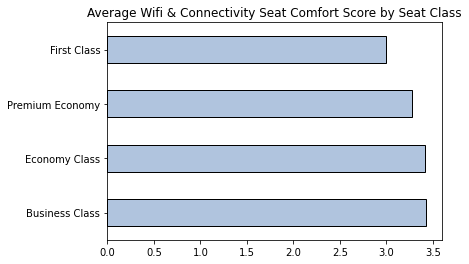

In [421]:
plot_scores('Wifi & Connectivity')

Wifi may not be used by most passengers. For those that did use it and gave a rating, the highest was by business class passengers and the lowest by first class

In [332]:
# Looking at economy which is our biggest category
selected2 = reviews[['Seat Class','From','Seat Comfort','Cabin Staff Service','Food & Beverages', 'Inflight Entertainment', 'Ground Service',
        'Wifi & Connectivity','Value For Money']]

In [334]:
# Group by departure airport and get the places with the lowest mean rating for seat comfort
selected2[(selected2['Seat Class']== 'Economy Class') & (selected2['From']!= 'Not Provided')].groupby('From', 
                                                                                                      as_index = False)['Seat Comfort'].mean().sort_values(by = 'Seat Comfort').head()

,From,Seat Comfort
0,Aberdeen,1.0
34,St Lucia,1.0
25,Melbourne,1.0
5,Bergen,1.0
6,Boston,1.0


In [335]:
# Group by departure airport and get the places with the highest mean rating for seat comfort
selected2[(selected2['Seat Class']== 'Economy Class') & (selected2['From']!= 'Not Provided')].groupby('From', 
                                                                                                      as_index = False)['Seat Comfort'].mean().sort_values(by = 'Seat Comfort', ascending = False).head()

,From,Seat Comfort
19,Kagi,2.0
32,Perth,2.0
11,Dulles,2.0
27,Montego Bay,2.0
17,Honolulu,2.0


### Text Analysis

We can find out average length of review, use an out of box sentiment analyser to get sentiment on each review and then we can analyse this by class. We could also determine topics to see if there are any other categories that people are complaining about and also whether the average sentiment we calculate from the text compares to the overall sentiment for the categories for the airline as a whole

In [340]:
reviews2 = reviews.copy()

In [343]:
# Function to count words
def count_words(text):
    return len(text.split())

# Apply the function to the 'text' column
reviews2['Length'] = reviews2['Review Text'].apply(count_words)

In [344]:
# Get stats
reviews2['Length'].describe()

count    500.000000
mean     166.724000
std      110.231565
min       23.000000
25%       88.000000
50%      139.000000
75%      216.000000
max      665.000000
Name: Length, dtype: float64

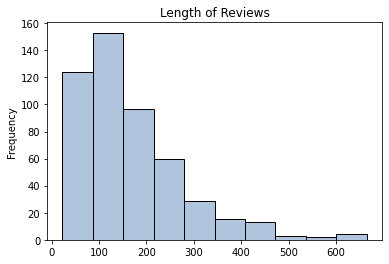

In [345]:
reviews2['Length'].plot(kind = 'hist', color = 'lightsteelblue',ec = 'k', title = 'Length of Reviews');

The maximum length of a review is 665 words and the minimum 23 words. The mean is more than the median, indicating some skew which is not surprising and is clearly shown in the histogram

In [346]:
# Reviews longer than 500 words
reviews2[reviews2['Length']>500]

,Review Date,Review Title,Review Text,Flight Date,Seat Class,From,To,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Month,Length
79,2022-01-05,Virgin has cut back everything,Arrived at LHR to be greeted by Virgin groun...,2021-10-01 00:00:00,Premium Economy,London Heathrow,Antigua,2,5,3,3,4,0,3,1,563
48,2018-12-04,I thought it a good value product,Bridgetown to London. After leaving a cruise...,2018-12-01 00:00:00,Economy Class,Barbados,London Heathrow,1,2,5,3,3,4,3,12,573
96,2017-08-14,not be travelling Virgin again,Verified Review Gatwick to Orlando return. In...,2017-07-01 00:00:00,Economy Class,New York,London Heathrow,1,1,2,1,1,0,1,8,635
28,2017-02-28,lost the extra legroom seats,Verified Review My booking was with Virgin At...,2017-02-01 00:00:00,Economy Class,Melbourne,London Heathrow,1,2,5,3,3,0,4,2,665
39,2017-01-17,never flying Virgin again,Verified Review Atlanta to London. I've long ...,2016-12-01 00:00:00,Business Class,Hartsfield Jackson Atlanta,London Heathrow,2,5,3,3,4,0,3,1,638
43,2017-01-11,we have had no apology,Verified Review London Heathrow to Johannesbu...,2016-12-01 00:00:00,Economy Class,London Heathrow,Johannesburg,2,5,3,3,4,0,3,1,629
0,2016-04-08,squeezed in as many seats as possible,Flew Los Angeles to London Heathrow. It's been...,2016-04-01 00:00:00,Premium Economy,Los Angeles,London Heathrow,3,1,1,2,1,1,1,4,510
75,2015-03-04,Virgin Atlantic customer review,Flew ABZ-LHR-EWR returning JFK-LHR-ABZ. Outwar...,Not available,Economy Class,Not Provided,Not Provided,1,1,2,5,0,0,3,3,515


In [423]:
# Does the length of review vary by seat class?
pd.DataFrame(reviews2.groupby('Seat Class')['Length'].mean()).sort_values(by = 'Length',ascending = False)

,Length
Seat Class,
Business Class,172.843750
Premium Economy,170.881720
Economy Class,163.884488
First Class,152.500000


People flying business seem to leave the longest reviews and those flying by first class the shortest

In [349]:
# import SentimentIntensityAnalyzer class from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [350]:
# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply the function to the 'text' column
reviews2['sentiment_scores'] = reviews2['Review Text'].apply(get_sentiment_scores)

# Optionally: Split the sentiment scores into separate columns
reviews_sentiment = reviews2['sentiment_scores'].apply(pd.Series)

# Combine the original DataFrame with the sentiment scores
reviews_all = pd.concat([reviews2, reviews_sentiment], axis=1)

# Drop the combined columm
reviews_all.drop(columns = ['sentiment_scores'],axis = 1, inplace = True)

# Display the result
reviews_all.head()

,Review Date,Review Title,Review Text,Flight Date,Seat Class,From,To,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Month,Length,neg,neu,pos,compound
0,2025-03-08,appalling customer service,I’m extremely disappointed with the appalli...,2025-02-01 00:00:00,Economy Class,London Heathrow,Montego Bay,3,1,1,2,1,1,1,3,140,0.085,0.865,0.050,-0.6575
1,2025-02-26,Very cramped space for legs,"Very cramped space for legs, I am 186 (6""1) a...",2025-02-01 00:00:00,Economy Class,Antigua,London Heathrow,2,5,3,3,4,3,3,2,89,0.000,0.708,0.292,0.9872
2,2025-01-05,grateful to staff at DEL airport,I am grateful to the staff at DEL airport for...,2025-01-01 00:00:00,Economy Class,Delhi,London Heathrow,0,0,0,0,2,0,5,1,60,0.073,0.787,0.140,0.6908
3,2024-09-16,never make the mistake of using Virgin again,Normally I would connect in Amsterdam but go...,2024-09-01 00:00:00,Business Class,Orlando,London Heathrow,1,2,1,1,1,0,2,9,171,0.112,0.801,0.088,-0.5730
4,2024-08-13,crew with brilliant hospitality,Where do I start. this was simply the best fl...,2024-08-01 00:00:00,Premium Economy,London Heathrow,New York,1,2,5,3,3,4,3,8,111,0.018,0.732,0.250,0.9859


Score Range: The compound score ranges from -1 to +1:

-1 indicates extremely negative sentiment.
0 indicates neutral sentiment.
+1 indicates extremely positive sentiment.  

Thresholds for Interpretation:

Negative Sentiment: A compound score less than 0 (e.g., -1 to -0.01) suggests a negative sentiment.  
Neutral Sentiment: A compound score around 0 (typically -0.05 to +0.05) indicates neutral sentiment.  
Positive Sentiment: A compound score greater than 0 (e.g., 0.01 to +1) suggests a positive sentiment.  

General Guidelines:

Scores closer to -1 or +1 indicate stronger sentiments, while scores closer to 0 indicate weaker sentiments.

In [351]:
# Mean score for the compound
reviews_all['compound'].mean()

0.3084770000000001

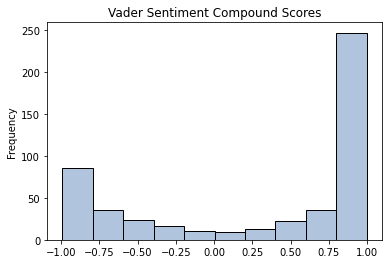

In [352]:
reviews_all['compound'].plot(kind = 'hist', ec = 'k', color = 'lightsteelblue', title = 'Vader Sentiment Compound Scores');

Overall from the text, we can see that most comments are falling into being positive

In [353]:
# Sentiment by length of review - are negative reviews more likely to be longer or shorter than positive?
print("Negative reviews length:",reviews_all[reviews_all['compound']< -0.05]['Length'].mean())
print("Positive reviews length:",reviews_all[reviews_all['compound']> 0.01]['Length'].mean())

Negative reviews length: 176.64285714285714
Positive reviews length: 162.1039755351682


Negative reviews are a bit longer than positive ones on average

In [355]:
# Check a sample
reviews_all.iloc[0]['Review Text']

'   I’m extremely disappointed with the appalling customer service I’ve received from Virgin Atlantic. It has been over 35 days since I submitted a refund request for a duplicate charge and an issue with the condition of my seat, and despite numerous emails, phone calls, and promises of resolution, I’m still no closer to receiving the refund I’m owed. The way my case has been handled has been nothing short of frustrating. I’ve been repeatedly told that the refund is “being processed” or that they’re “waiting for my bank details” — despite the fact that I’ve already provided this information multiple times. It’s incredibly frustrating to be met with silence, delays, and unsatisfactory gestures of compensation, including the offer of points that require me to spend even more money to redeem. It’s clear that Virgin Atlantic doesn’t take customer issues seriously,'

In [356]:
reviews_all.iloc[0]['compound']

-0.6575

In [358]:
reviews_all.iloc[25]['Review Text']

"  Great flights. Very good food, the mile high tea on the lhr-jfk leg was a really nice touch. A huge selection of music and movies to choose from. Friendly flight attendants available and happy to provide an extra drink or snack, including a fine selection of alcoholic beverages free. Good selection of items in the onboard duty free. The great service even starts on the ground, i.e. I'd injured my hand shortly before flying, and was allowed to check my carryon for free. Virgin sets the bar for great customer service, all airlines should aspire to be this good."

In [359]:
reviews_all.iloc[25]['compound']

0.9929

Looks pretty good from a sample of a couple of the reviews

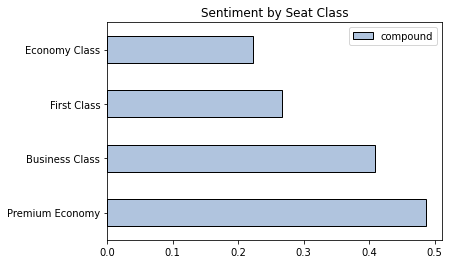

In [426]:
# Lets look at the reviews by seat class
sent_seat = reviews_all.groupby('Seat Class', as_index = False)['compound'].mean().sort_values(by = 'compound',ascending = False).set_index('Seat Class')
sent_seat.plot(kind = 'barh', title = 'Sentiment by Seat Class', color = 'lightsteelblue', ec = 'k')
plt.gca().set_ylabel("");

The most positive scores are associated with premium economy seats

In [428]:
# Lets look at the reviews by departure location
sent_dep = reviews_all.groupby('From', as_index = False)['compound'].mean().sort_values(by = 'compound',ascending = False).set_index('From').head(10)
sent_dep.columns = ['Compound Sentiment Score']
sent_dep

,Compound Sentiment Score
From,
Antigua,0.98720
Honolulu,0.97900
Tampa,0.96590
Aberdeen,0.95605
Dulles,0.94670
Barbados,0.93080
Shanghai,0.88665
Cork,0.87810
Cancun,0.86810


Flights from Antigua seem to have a high positive score which is good. However, we need to be careful as there may not be many reviews. Lets look.

In [363]:
# Number of reviews from Antigua
reviews_all[reviews_all['From']=='Antigua']

,Review Date,Review Title,Review Text,Flight Date,Seat Class,From,To,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Month,Length,neg,neu,pos,compound
1,2025-02-26,Very cramped space for legs,"Very cramped space for legs, I am 186 (6""1) a...",2025-02-01 00:00:00,Economy Class,Antigua,London Heathrow,2,5,3,3,4,3,3,2,89,0.0,0.708,0.292,0.9872


We can see that there is just one review making up this mean compound score, so we should be careful in making conclusions from this limited data. It might be better to have a look at the scores for the top airports that flights fly from and to. 

In [431]:
# Mean score for reviews for flights leaving from or arriving at Heathrow
round(reviews_all[(reviews_all['From'] =='London Heathrow') | (reviews_all['To'] == 'London Heathrow')]['compound'].mean(),2)

0.26

Quite a low score relative to other locations. Does it differ as to whether you are leaving or arriving at London?

In [432]:
# Mean score for reviews for flights leaving from Heathrow
round(reviews_all[reviews_all['From'] =='London Heathrow']['compound'].mean(),2)

0.35

In [433]:
# Mean score for reviews for flights arriving to Heathrow
round(reviews_all[reviews_all['To'] =='London Heathrow']['compound'].mean(),2)

0.14

There is a difference here suggesting that passengers arriving back into London Heathrow give a more negative review than those leaving from Heathrow. We need to be careful here as there might be all kinds of reasons for this. People heading out, especially for holidays are likely to be more positive. Many of the flights out of Heathrow will be day flights and flights landing back are often night flights when people are tired and this could also affect the rating. Also, the airport itself can obviously have an impact, whether there are delays, weather issues out etc and this might get reflected in the rating for the airline even if it has nothing to do with it.

In [372]:
# Simple wordcloud to see what people are raising in the text
from wordcloud import WordCloud, STOPWORDS

In [444]:
# Create wordcloud
def create_cloud(text):
    
    stop_words = ["Virgin","Atlantic","flight","London Heathrow","told"] + list(STOPWORDS) # add some extra ones

    wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis',
                      stopwords = stop_words,
                      collocation_threshold = 3,
                      ).generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

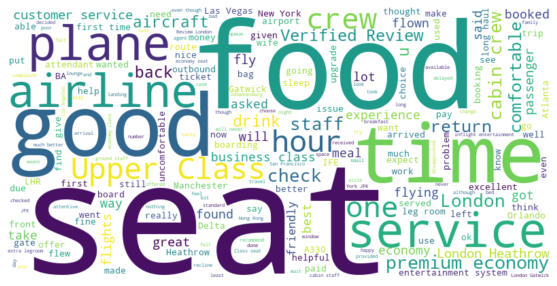

In [450]:
text = ''.join(reviews_all['Review Text'])
create_cloud(text)

We can see that the seat, the food and the level of service are the most frequent words raised in the reviews in line with the categories that the review uses and what we have already derived from the analysis of star ratings. We could split out the positive and negative reviews and see if different categories are highlighted.

In [446]:
# Split dataframe based on thresholds
neg = reviews_all[reviews_all['compound']< -0.05]
pos = reviews_all[reviews_all['compound']> 0.01]

In [447]:
# Create text
text_neg = ''.join(neg['Review Text'])
text_pos = ''.join(pos['Review Text'])

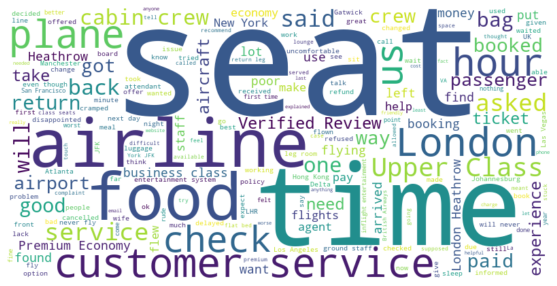

In [448]:
create_cloud(text_neg)

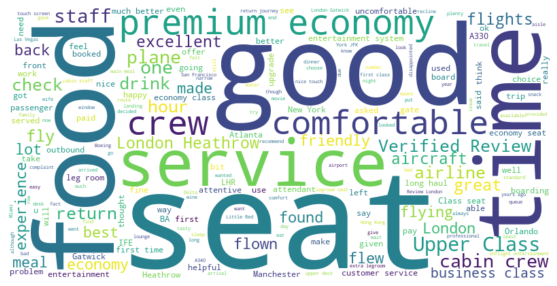

In [449]:
create_cloud(text_pos)

We could extend this analysis further using a topic model such as LDA, NMF or one of the newer models leveraging LLMs such as BERTopic. Topic models generally work best with lots of data, so perhaps we will return to this at another time after scraping many more reviews possibly across different airlines.